# Importar bibliotecas

In [233]:

import pandas as pd 
import seaborn as sns
import random
import numpy  as np 
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Importar data set 

In [235]:

# Carregar uma amostra dos dados
train_df = pd.read_csv('train.csv')

# Exploracao de dados

In [236]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [237]:
train_df.head()
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [238]:
train_df.shape

(100000, 28)

# Limpar dados

In [239]:
#  Verificar valores faltantes
def missing_data(train_df):
    miss1 = pd.DataFrame(train_df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(train_df.isnull().sum()/train_df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Percentage of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [240]:
missing_data(train_df)

,columns,Num of Miss,Percentage of Miss
3,Name,9985,9.985
8,Monthly_Inhand_Salary,15002,15.002
13,Type_of_Loan,11408,11.408
15,Num_of_Delayed_Payment,7002,7.002
17,Num_Credit_Inquiries,1965,1.965
21,Credit_History_Age,9030,9.030
24,Amount_invested_monthly,4479,4.479
26,Monthly_Balance,1200,1.200


In [241]:
#Retirando colunas que nao sao importantes
dados1 = train_df.drop(columns=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary',
                           'Type_of_Loan','Num_of_Delayed_Payment','Amount_invested_monthly'])

In [242]:
missing_data(dados1)

,columns,Num of Miss,Percentage of Miss
9,Num_Credit_Inquiries,1965,1.965
13,Credit_History_Age,9030,9.030
17,Monthly_Balance,1200,1.200


In [243]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

# Removendo hifens(-) e underlines(_) e colocando Unknow em algumas linha de Payment_Behaviour

In [244]:
# Deletando (-) e (_) nas colunas de forma compacta
colunas_para_limpar = ['Age', 'Annual_Income', 'Num_of_Loan', 
                       'Outstanding_Debt', 'Monthly_Balance', 'Credit_History_Age']

for coluna in colunas_para_limpar:
    dados1[coluna] = dados1[coluna].str.replace('[-_]', '', regex=True)

# Tratamento especial para Changed_Credit_Limit: substitui '-' e '_' por '0'
dados1['Changed_Credit_Limit'] = dados1['Changed_Credit_Limit'].str.replace('[-_]', '0', regex=True)

# Substituindo (!@9#%8) por (Unknown) na coluna Payment_Behaviour
dados1['Payment_Behaviour'] = dados1['Payment_Behaviour'].str.replace('!@9#%8', 'Unknown', regex=False)


In [245]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

#Alterado Dtype para int e float

In [246]:
dados1['Age'] = dados1['Age'].astype(int)
dados1['Annual_Income'] = dados1['Annual_Income'].astype(float)
dados1['Num_of_Loan'] = dados1['Num_of_Loan'].astype(int)
dados1['Changed_Credit_Limit'] = dados1['Changed_Credit_Limit'].astype(float)
dados1['Outstanding_Debt'] = dados1['Outstanding_Debt'].astype(float)
dados1['Monthly_Balance'] = dados1['Monthly_Balance'].astype(float)

In [247]:

# Remover outliers de 'Age' (idade > 80 vira NaN) e preencher para frente
dados1['Age'] = dados1['Age'].where(dados1['Age'] <= 80)
dados1['Age'] = dados1['Age'].fillna(method='ffill')

# Preencher valores ausentes de colunas numéricas com a média
colunas_media = ['Monthly_Balance', 'Num_Credit_Inquiries']
for coluna in colunas_media:
    dados1[coluna] = dados1[coluna].fillna(dados1[coluna].mean())

# Preencher valores ausentes de colunas categóricas
dados1['Occupation'] = dados1['Occupation'].replace('_______', np.nan).fillna(method='ffill')
dados1['Credit_Mix'] = dados1['Credit_Mix'].replace('_', np.nan).fillna(method='bfill')

# Remover quaisquer registros ainda com NaN
dados1 = dados1.dropna()

# Visualizar resultado
dados1

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4,3,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,3.124941e+02,Good
2,23.0,Scientist,19114.12,3,4,3,4,3,0.00,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,3.312099e+02,Good
3,23.0,Scientist,19114.12,3,4,3,4,5,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,2.234513e+02,Good
4,23.0,Scientist,19114.12,3,4,3,4,6,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,3.414892e+02,Good
5,23.0,Scientist,19114.12,3,4,3,4,8,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,Unknown,3.404792e+02,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,4,6,7,2,23,11.50,3.0,Good,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,3.088580e+22,Poor
99996,25.0,Mechanic,39628.99,4,6,7,2,18,11.50,3.0,Good,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,3.088580e+22,Poor
99997,25.0,Mechanic,39628.99,4,6,5729,2,27,11.50,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,3.088580e+22,Poor
99998,25.0,Mechanic,39628.99,4,6,7,2,20,11.50,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,3.088580e+22,Standard


In [248]:
dados1.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,90970.000000,9.097000e+04,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,90970.000000,9.097000e+04
mean,33.319424,1.761397e+05,17.106486,22.678103,72.634891,10.751632,21.066560,10.251830,27.426304,1427.192068,32.290138,1409.538886,3.018795e+22
std,10.780344,1.428934e+06,117.399455,129.888488,467.411923,61.792557,14.875574,6.769734,189.256196,1155.844159,5.116074,8318.512998,3.125773e+24
min,14.000000,7.005930e+03,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.230000,20.100770,0.000000,7.759665e-03
25%,24.000000,1.946381e+04,3.000000,4.000000,8.000000,2.000000,10.000000,4.990000,3.000000,566.770000,28.058054,30.338204,2.717463e+02
50%,33.000000,3.765418e+04,6.000000,5.000000,13.000000,3.000000,18.000000,9.250000,6.000000,1166.370000,32.312064,69.319387,3.412248e+02
75%,42.000000,7.302692e+04,7.000000,7.000000,20.000000,6.000000,28.000000,14.680000,9.000000,1946.810000,36.499412,161.747685,4.912387e+02
max,56.000000,2.419806e+07,1798.000000,1499.000000,5797.000000,1485.000000,67.000000,36.970000,2594.000000,4998.070000,50.000000,82331.000000,3.333333e+26


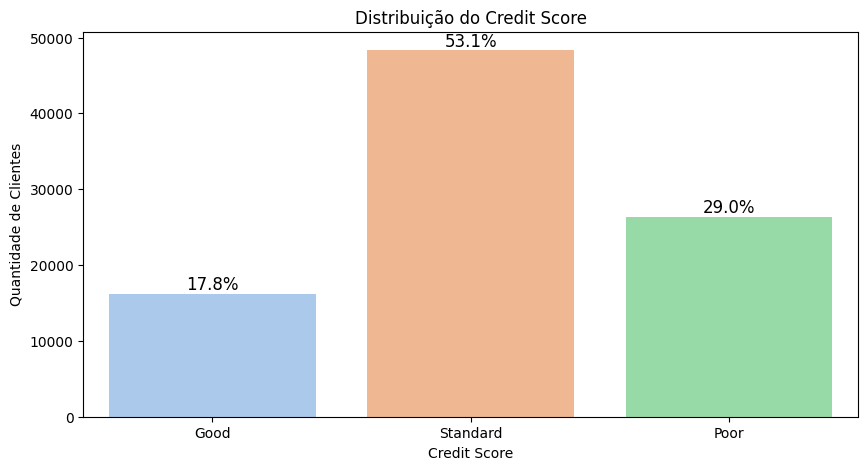

In [249]:

# Grafico de barras
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=dados1, x='Credit_Score', palette='pastel')


total = len(data1)  
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)


plt.title('Distribuição do Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Quantidade de Clientes')
plt.show()


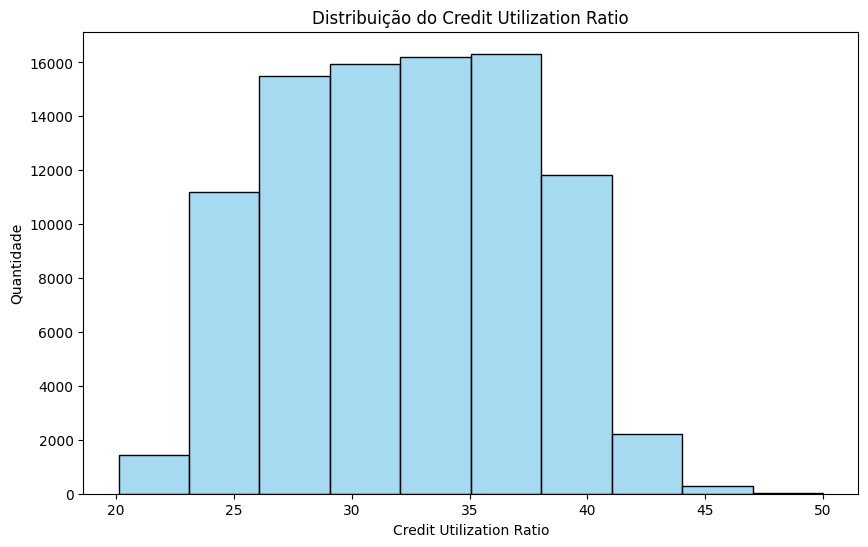

In [261]:
#Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=dados1, x='Credit_Utilization_Ratio', bins=10, kde=False, color='skyblue')
plt.title('Distribuição do Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Quantidade')
plt.show()


# Transformar variáveis categóricas

In [262]:
le = LabelEncoder()
df = dados1

In [263]:
categorical=[]
for i in df.columns:
    if df[i].dtype == object:
        categorical.append(i)

In [264]:
cat_list = df.select_dtypes('object').columns

for i in cat_list:
    df[i] = le.fit_transform(df[i])

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90970 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       90970 non-null  float64
 1   Occupation                90970 non-null  int64  
 2   Annual_Income             90970 non-null  float64
 3   Num_Bank_Accounts         90970 non-null  int64  
 4   Num_Credit_Card           90970 non-null  int64  
 5   Interest_Rate             90970 non-null  int64  
 6   Num_of_Loan               90970 non-null  int64  
 7   Delay_from_due_date       90970 non-null  int64  
 8   Changed_Credit_Limit      90970 non-null  float64
 9   Num_Credit_Inquiries      90970 non-null  float64
 10  Credit_Mix                90970 non-null  int64  
 11  Outstanding_Debt          90970 non-null  float64
 12  Credit_Utilization_Ratio  90970 non-null  float64
 13  Credit_History_Age        90970 non-null  int64  
 14  Payment_of_

<Axes: >

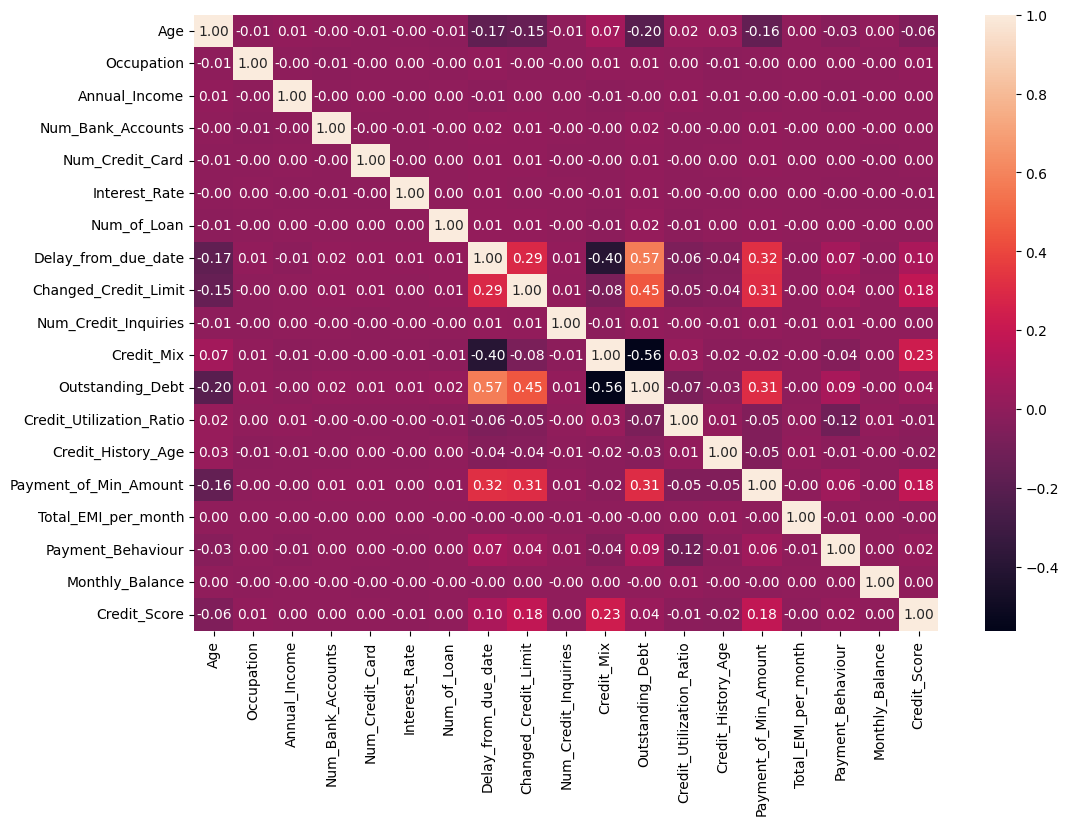

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True ,fmt='.2f')

#  Separação Treino e Teste

In [267]:
x = df.drop('Credit_Score' , axis=1)
y = df['Credit_Score']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=25)
display(
x_train.shape,
y_train.value_counts()
)

(81873, 18)

Credit_Score
2    43597
1    23707
0    14569
Name: count, dtype: int64

#  Modelo Árvore de Decisão

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1655
           1       0.72      0.72      0.72      2689
           2       0.74      0.74      0.74      4753

    accuracy                           0.72      9097
   macro avg       0.71      0.71      0.71      9097
weighted avg       0.72      0.72      0.72      9097

<function plot_confusion_matrix at 0x16c30ba60>


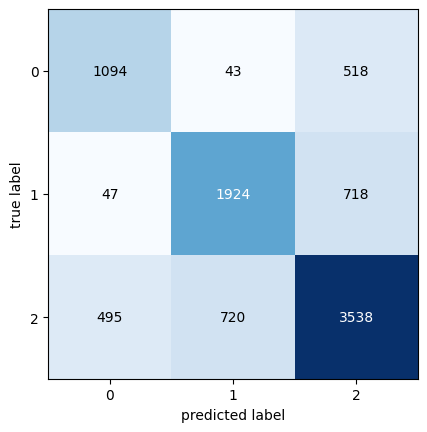

In [268]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train , y_train)

y_pred = dtree.predict(x_test)
acc = accuracy_score(y_test ,y_pred)
a = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(a,show_normed=False)
report = classification_report(y_test, y_pred)
print(report)
print(plot_confusion_matrix)

# Modelo Random Forest

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1655
           1       0.79      0.82      0.81      2689
           2       0.82      0.81      0.82      4753

    accuracy                           0.81      9097
   macro avg       0.80      0.80      0.80      9097
weighted avg       0.81      0.81      0.81      9097



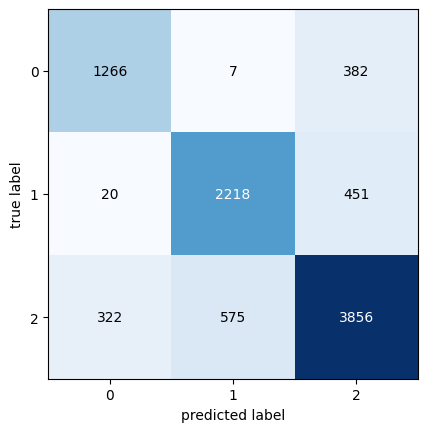

In [269]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
v = confusion_matrix(y_test , rf_y_pred)
plot_confusion_matrix(v,show_normed=False)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
report = classification_report(y_test,rf_y_pred)
print(report)

# Regressão Logística

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1655
           1       0.00      0.00      0.00      2689
           2       0.52      1.00      0.69      4753

    accuracy                           0.52      9097
   macro avg       0.17      0.33      0.23      9097
weighted avg       0.27      0.52      0.36      9097



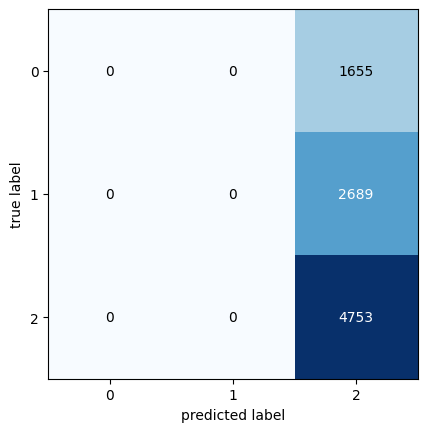

In [270]:

lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
v = confusion_matrix(y_test, lr_y_pred)
plot_confusion_matrix(v, show_normed=False)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred)
print(report)


# Algoritmo Não Supervisionado: K-Means

              precision    recall  f1-score   support

           0       0.19      0.03      0.05      1655
           1       0.00      0.00      0.00      2689
           2       0.52      0.97      0.68      4753

    accuracy                           0.51      9097
   macro avg       0.24      0.33      0.24      9097
weighted avg       0.31      0.51      0.36      9097



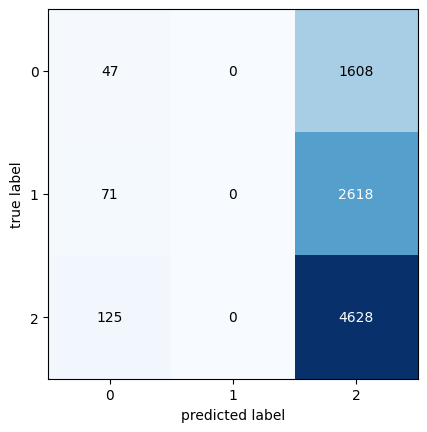

In [271]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Treinamento do KMeans
kmeans = KMeans(n_clusters=3, random_state=10)  # Ajuste o número de clusters
kmeans.fit(x_train)

# Predição dos clusters
kmeans_y_pred = kmeans.predict(x_test)

# Avaliação - comparando os clusters com as classes reais
b = confusion_matrix(y_test, kmeans_y_pred)
plot_confusion_matrix(b, show_normed=False)

# Acurácia
kmeans_accuracy = accuracy_score(y_test, kmeans_y_pred)

# Relatório de Classificação
report = classification_report(y_test, kmeans_y_pred)
print(report)
